# CIND820 Analytics Project
# Controlling a Pandemic: Analyzing Key Factors in COVID-19 Outcomes by Country
Dataset: Our world in COVID-19

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

#Visualization
#!pip install plotly_express
import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling and evaluation
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [3]:
OWIDdf = pd.read_csv('https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv')

In [4]:
OWIDdf.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [5]:
OWIDdf.describe()
#many nonsensical negative values like -min in new_deaths columns.

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,7.431600e+04,74314.000000,73313.000000,6.505700e+04,65215.000000,73313.000000,73911.000000,73909.000000,72913.000000,64665.000000,...,68755.000000,46904.000000,69372.000000,70267.000000,54507.000000,53758.000000,34827.000000,63470.000000,71792.000000,69313.000000
mean,6.655909e+05,5188.697648,5200.313275,1.960412e+04,132.242874,116.491705,7918.087498,67.464113,67.313940,185.392468,...,19150.481258,13.288792,257.286565,7.800097,10.548080,32.648611,50.993681,3.035506,73.148891,0.727794
std,4.670789e+06,32343.586906,32049.548025,1.148709e+05,723.531067,661.448040,15552.483403,169.340864,142.560619,329.425927,...,19747.680858,19.925263,118.498685,3.943885,10.409536,13.466974,31.767372,2.466953,7.552139,0.150157
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,7.280000e+02,2.000000,6.000000,3.900000e+01,0.000000,0.000000,153.224500,0.144000,1.016000,5.724000,...,4466.507000,0.500000,167.295000,5.290000,1.900000,21.600000,20.859000,1.300000,67.880000,0.602000
50%,8.260000e+03,60.000000,73.143000,2.560000e+02,2.000000,1.000000,1101.278000,6.487000,8.644000,31.896000,...,12951.839000,2.000000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.530000,0.748000
75%,8.904750e+04,681.000000,705.286000,2.442000e+03,16.000000,12.286000,7386.655500,58.064000,65.304000,197.988000,...,27216.445000,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,4.000000,78.730000,0.848000
max,1.211977e+08,880902.000000,739564.429000,2.680445e+06,17895.000000,14424.000000,147026.467000,8652.658000,2648.773000,2268.843000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.957000


In [6]:
OWIDdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75558 entries, 0 to 75557
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               75558 non-null  object 
 1   continent                              71843 non-null  object 
 2   location                               75558 non-null  object 
 3   date                                   75558 non-null  object 
 4   total_cases                            74316 non-null  float64
 5   new_cases                              74314 non-null  float64
 6   new_cases_smoothed                     73313 non-null  float64
 7   total_deaths                           65057 non-null  float64
 8   new_deaths                             65215 non-null  float64
 9   new_deaths_smoothed                    73313 non-null  float64
 10  total_cases_per_million                73911 non-null  float64
 11  ne

# Data Preprocessing

In [8]:
#The location column contains continent and country values, but we are only interested in countries
OWIDdf = OWIDdf[-OWIDdf.location.isin(['World', 'South America','North America','Asia','Africa','Europe','Australiasia','Antarctica','European Union'])]

In [10]:
#Removing redundant columns
#some columns are removed due to multicollinearity
OWIDdf = OWIDdf.drop(columns=['total_cases','total_deaths','total_tests','aged_65_older','aged_70_older','iso_code','continent'])

KeyError: "['total_cases' 'total_deaths' 'total_tests' 'aged_65_older'\n 'aged_70_older' 'iso_code' 'continent'] not found in axis"

In [11]:
###new_ features removed as they will correlate with total_ columns

OWIDdf = OWIDdf[OWIDdf.columns.difference(OWIDdf.filter(like='new').columns,sort=False)]

In [13]:
OWIDdf.isnull().sum()

location                                   0
date                                       0
total_cases_per_million                 1643
total_deaths_per_million               10770
reproduction_rate                      12332
icu_patients                           64907
icu_patients_per_million               64907
hosp_patients                          63329
hosp_patients_per_million              63329
weekly_icu_admissions                  71983
weekly_icu_admissions_per_million      71983
weekly_hosp_admissions                 71405
weekly_hosp_admissions_per_million     71405
total_tests_per_thousand               38721
positive_rate                          34946
tests_per_case                         35525
tests_units                            32323
total_vaccinations                     68536
people_vaccinated                      69019
people_fully_vaccinated                70298
total_vaccinations_per_hundred         68536
people_vaccinated_per_hundred          69019
people_ful

In [14]:
###Removing columns where na is more than 50000

OWIDdf = OWIDdf.loc[:, OWIDdf.isna().sum() < 50000]

In [15]:
OWIDdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72666 entries, 0 to 75557
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    72666 non-null  object 
 1   date                        72666 non-null  object 
 2   total_cases_per_million     71023 non-null  float64
 3   total_deaths_per_million    61896 non-null  float64
 4   reproduction_rate           60334 non-null  float64
 5   total_tests_per_thousand    33945 non-null  float64
 6   positive_rate               37720 non-null  float64
 7   tests_per_case              37141 non-null  float64
 8   tests_units                 40343 non-null  object 
 9   stringency_index            64755 non-null  float64
 10  population                  72252 non-null  float64
 11  population_density          70102 non-null  float64
 12  median_age                  68100 non-null  float64
 13  gdp_per_capita              683

In [16]:
#removing other time-related variables
OWIDdf = OWIDdf.drop(columns=['positive_rate','tests_units','tests_per_case'])

In [17]:
OWIDdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72666 entries, 0 to 75557
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    72666 non-null  object 
 1   date                        72666 non-null  object 
 2   total_cases_per_million     71023 non-null  float64
 3   total_deaths_per_million    61896 non-null  float64
 4   reproduction_rate           60334 non-null  float64
 5   total_tests_per_thousand    33945 non-null  float64
 6   stringency_index            64755 non-null  float64
 7   population                  72252 non-null  float64
 8   population_density          70102 non-null  float64
 9   median_age                  68100 non-null  float64
 10  gdp_per_capita              68334 non-null  float64
 11  extreme_poverty             46483 non-null  float64
 12  cardiovasc_death_rate       68951 non-null  float64
 13  diabetes_prevalence         698

In [19]:
odft = OWIDdf[OWIDdf['total_tests_per_thousand'].notna()]

In [20]:
odft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33945 entries, 787 to 75552
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    33945 non-null  object 
 1   date                        33945 non-null  object 
 2   total_cases_per_million     33646 non-null  float64
 3   total_deaths_per_million    32001 non-null  float64
 4   reproduction_rate           31808 non-null  float64
 5   total_tests_per_thousand    33945 non-null  float64
 6   stringency_index            32965 non-null  float64
 7   population                  33945 non-null  float64
 8   population_density          33424 non-null  float64
 9   median_age                  33932 non-null  float64
 10  gdp_per_capita              33152 non-null  float64
 11  extreme_poverty             26541 non-null  float64
 12  cardiovasc_death_rate       33928 non-null  float64
 13  diabetes_prevalence         3

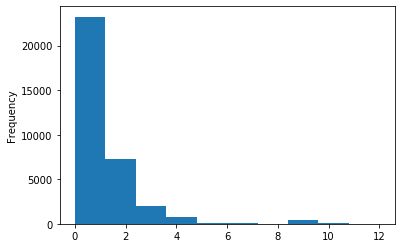

In [27]:
odft.isnull().sum(axis = 1).plot(kind='hist')

In [28]:
#Remove rows with 5+ NAs
odft = odft[odft.isnull().sum(axis=1) < 5]

In [29]:
#Removing NA from dependent variables

odft = odft[odft['total_cases_per_million'].notna()]
odft = odft[odft['total_deaths_per_million'].notna()]
odft = odft[odft['reproduction_rate'].notna()]

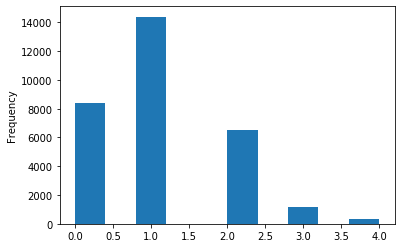

In [30]:
odft.isnull().sum(axis = 1).plot(kind='hist')

In [31]:
odft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30835 entries, 816 to 75552
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    30835 non-null  object 
 1   date                        30835 non-null  object 
 2   total_cases_per_million     30835 non-null  float64
 3   total_deaths_per_million    30835 non-null  float64
 4   reproduction_rate           30835 non-null  float64
 5   total_tests_per_thousand    30835 non-null  float64
 6   stringency_index            29897 non-null  float64
 7   population                  30835 non-null  float64
 8   population_density          30835 non-null  float64
 9   median_age                  30835 non-null  float64
 10  gdp_per_capita              30485 non-null  float64
 11  extreme_poverty             24251 non-null  float64
 12  cardiovasc_death_rate       30835 non-null  float64
 13  diabetes_prevalence         3

# Imbalanced Target Data 

Much of the target variables have sparse data or are heavily imbalanced and must be further processed to yield more realistic results. SMOGN will later be used to solve this problem

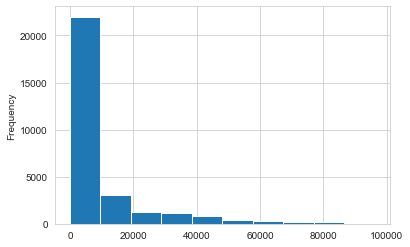

In [252]:
#Total_cases_per_million
#Imbalanced data?
odf.total_cases_per_million.plot(kind='hist')

In [253]:
odf[odf.total_cases_per_million < 10000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22286 entries, 20218 to 74863
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    22286 non-null  object        
 1   date                        22286 non-null  datetime64[ns]
 2   total_cases_per_million     22286 non-null  float64       
 3   total_deaths_per_million    22286 non-null  float64       
 4   reproduction_rate           22286 non-null  float64       
 5   total_tests_per_thousand    17621 non-null  float64       
 6   positive_rate               19496 non-null  float64       
 7   tests_per_case              19408 non-null  float64       
 8   tests_units                 19630 non-null  object        
 9   stringency_index            21853 non-null  float64       
 10  population                  22286 non-null  float64       
 11  population_density          22286 non-null  float6

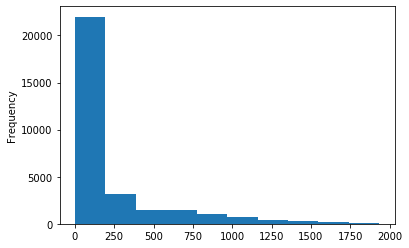

In [40]:
#total_deaths_per_million
#Imbalanced
odft.total_deaths_per_million.plot(kind='hist')

29.304     179
0.110      127
5.184      122
0.831      109
5.716      101
          ... 
25.520       1
13.666       1
71.331       1
394.508      1
2.000        1
Name: total_deaths_per_million, Length: 21358, dtype: int64

6.74


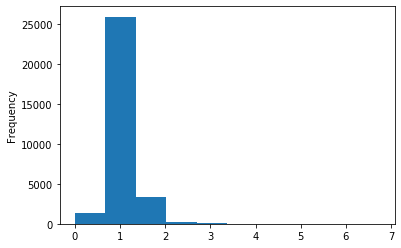

In [41]:
#Looking at the distribution of reproduction_rate
odf.reproduction_rate.plot(kind ='hist')
print(odf.reproduction_rate.max())

# Exploratory Data Analysis 

In [32]:
odft.corr()

,total_cases_per_million,total_deaths_per_million,reproduction_rate,total_tests_per_thousand,stringency_index,population,population_density,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases_per_million,1.000000,0.777057,-0.162155,0.625467,0.064536,-0.073200,0.065156,0.219626,0.317311,-0.243504,-0.140403,0.153773,0.208828,0.006854,0.310441,0.061512,0.275721,0.299157
total_deaths_per_million,0.777057,1.000000,-0.138328,0.338017,0.088826,-0.040772,-0.069796,0.254742,0.122039,-0.248355,-0.166818,-0.031585,0.299371,-0.061815,0.244174,0.073481,0.255042,0.274459
reproduction_rate,-0.162155,-0.138328,1.000000,-0.077263,-0.036677,0.034889,-0.016873,0.019133,-0.005316,-0.027329,0.023693,0.000073,0.029428,0.031941,0.005357,0.033289,0.005801,0.010530
total_tests_per_thousand,0.625467,0.338017,-0.077263,1.000000,-0.062696,-0.080079,0.146622,0.244240,0.436921,-0.211916,-0.136955,0.126257,0.194806,0.029077,0.329532,0.069821,0.296701,0.347821
stringency_index,0.064536,0.088826,-0.036677,-0.062696,1.000000,0.098533,0.013443,-0.147893,-0.084571,-0.087733,-0.051740,0.152934,-0.138968,0.003612,0.232461,-0.266772,-0.013824,-0.080765
population,-0.073200,-0.040772,0.034889,-0.080079,0.098533,1.000000,0.058026,-0.116430,-0.130200,0.083843,0.094796,0.090273,-0.175921,-0.045648,-0.005346,-0.138850,-0.163395,-0.165502
population_density,0.065156,-0.069796,-0.016873,0.146622,0.013443,0.058026,1.000000,0.025631,0.114828,0.026565,-0.133122,0.189979,-0.127595,0.085395,0.044415,-0.018129,0.109494,0.034904
median_age,0.219626,0.254742,0.019133,0.244240,-0.147893,-0.116430,0.025631,1.000000,0.530059,-0.663902,-0.175515,0.081522,0.731934,0.300062,0.768249,0.695149,0.810048,0.856265
gdp_per_capita,0.317311,0.122039,-0.005316,0.436921,-0.084571,-0.130200,0.114828,0.530059,1.000000,-0.474919,-0.397059,0.293682,0.299922,-0.062397,0.761916,0.234858,0.638196,0.723858
extreme_poverty,-0.243504,-0.248355,-0.027329,-0.211916,-0.087733,0.083843,0.026565,-0.663902,-0.474919,1.000000,0.144848,-0.368969,-0.404851,-0.275982,-0.765179,-0.375149,-0.709255,-0.743215


Text(0.5, 1, 'OWID COVID Correlation Heatmap')

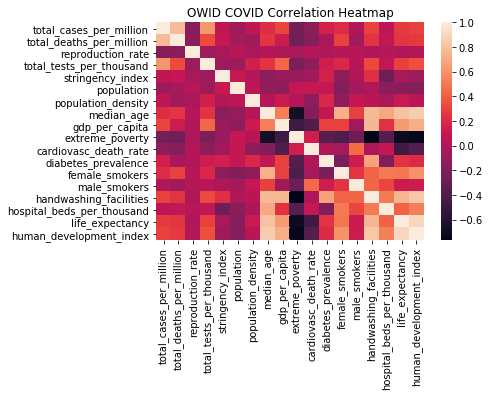

In [33]:
hmp = sns.heatmap(odft.corr())
hmp.set_title('OWID COVID Correlation Heatmap')

Text(0.5, 1, 'Features correlating with total_cases')

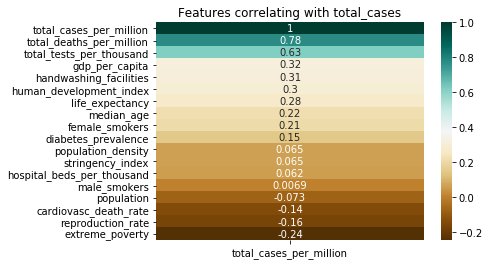

In [34]:
dhmp = sns.heatmap(odft.corr()[['total_cases_per_million']].sort_values(by='total_cases_per_million', ascending=False), annot=True, cmap='BrBG')
dhmp.set_title('Features correlating with total_cases')

Text(0.5, 1, 'Features correlating with total_deaths')

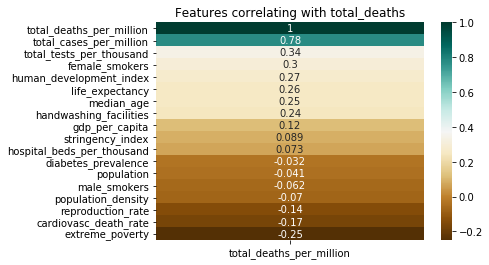

In [35]:
dhmp = sns.heatmap(odft.corr()[['total_deaths_per_million']].sort_values(by='total_deaths_per_million', ascending=False), annot=True, cmap='BrBG')
dhmp.set_title('Features correlating with total_deaths')

In [54]:
nowiddfn = odf.select_dtypes(include='float64')
#ppdf = sns.pairplot(nowiddfn.sample(1000))
#ppdf.savefig("pairplotowid.png")

Some of the target variables to consider: reproduction_rate, total_cases_per_million, total_deaths_per_million.
Normally we would also consider crude mortality rate or case-fatality rate as well. However, confirmed cases is often underreported AND undertested and as such may be harder to evaluate accurately. It is important to consider that the data being robust and accurate relies heavily on the nation's testing capacity. 

Remember that the reproduction rate (R) describes the trajectory of the virus. A value of R = 1 means the amount of new infections and new recoveries are equal; meaning the virus numbers will stagnate. A value of 6.74 means the number of infected is sharply increasing and may lead in a big spike of infections and deaths, depending on government mitigation strategy.

In [36]:
print(OWIDdf.reproduction_rate.max())
odf[odf.reproduction_rate==OWIDdf.reproduction_rate.max()]

6.74


,location,date,total_cases_per_million,total_deaths_per_million,reproduction_rate,total_tests_per_thousand,stringency_index,population,population_density,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
63106,South Korea,2020-02-22,8.446,0.039,6.74,0.383,45.37,51269183.0,527.967,43.4,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916


# Calculating Crude Mortality/Case-Fatality
- Crude Mortality and Case-Fatality are other metrics to see how each country mitigates COVID-19.

In [96]:
#Most recent data
odfdt = odft.copy()
odfdt['date'] = pd.to_datetime(odfdt['date'])
cutoff_date = pd.Timestamp('2021-02-01 00:00:00');

#Shortened dataset to only the most recent date to remove all time-related values
odfdt = odfdt[odfdt.date == cutoff_date]

In [105]:
#shortened dataset
odfdt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 1129 to 75513
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    92 non-null     object        
 1   date                        92 non-null     datetime64[ns]
 2   total_cases_per_million     92 non-null     float64       
 3   total_deaths_per_million    92 non-null     float64       
 4   reproduction_rate           92 non-null     float64       
 5   total_tests_per_thousand    92 non-null     float64       
 6   stringency_index            89 non-null     float64       
 7   population                  92 non-null     float64       
 8   population_density          92 non-null     float64       
 9   median_age                  92 non-null     float64       
 10  gdp_per_capita              91 non-null     float64       
 11  extreme_poverty             73 non-null     float64   

In [106]:
odft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30835 entries, 816 to 75552
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    30835 non-null  object 
 1   date                        30835 non-null  object 
 2   total_cases_per_million     30835 non-null  float64
 3   total_deaths_per_million    30835 non-null  float64
 4   reproduction_rate           30835 non-null  float64
 5   total_tests_per_thousand    30835 non-null  float64
 6   stringency_index            29897 non-null  float64
 7   population                  30835 non-null  float64
 8   population_density          30835 non-null  float64
 9   median_age                  30835 non-null  float64
 10  gdp_per_capita              30485 non-null  float64
 11  extreme_poverty             24251 non-null  float64
 12  cardiovasc_death_rate       30835 non-null  float64
 13  diabetes_prevalence         3

In [178]:
#Calculating Crude Mortality (COVID deaths/population) and CaseFatality (COVID deaths/COVID cases)
SK_Covid_Crude_Mortality = (OWIDdf[(OWIDdf.location == 'South Korea') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'South Korea') & (OWIDdf.date == most_recent_date)].population)
SK_Covid_CaseFatality = (OWIDdf[(OWIDdf.location == 'South Korea') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'South Korea') & (OWIDdf.date == most_recent_date)].total_cases)

SK_Median_age = OWIDdf[(OWIDdf.location == 'South Korea') & (OWIDdf.date == most_recent_date)].median_age.iloc[0]
print(" South Korea Crude Mortality:",SK_Covid_Crude_Mortality.iloc[0],"%\n","South Korea Case-Fatality: ",SK_Covid_CaseFatality.iloc[0],"%\n", "Median Age:", SK_Median_age)

 South Korea Crude Mortality: 3.267069810728211e-05 %
 South Korea Case-Fatality:  0.017444827478467356 %
 Median Age: 43.4


South Korea reported one of the largest spikes in the early stages of the pandemic, yet they are one of the countries with the lowest COVID-19 Mortality, which may be attributed to hospital bed capacity.

In [158]:
ITA_Covid_Crude_Mortality = (OWIDdf[(OWIDdf.location == 'Italy') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'Italy') & (OWIDdf.date == most_recent_date)].population)
ITA_Covid_CaseFatality = (OWIDdf[(OWIDdf.location == 'Italy') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'Italy') & (OWIDdf.date == most_recent_date)].total_cases)

ITA_Median_age = OWIDdf[(OWIDdf.location == 'Italy') & (OWIDdf.date == most_recent_date)].median_age.iloc[0]
print(" Italy Crude Mortality:",ITA_Covid_Crude_Mortality.iloc[0],"%\n","Italy Case-Fatality: ",ITA_Covid_CaseFatality.iloc[0],"%\n", "Median Age:", ITA_Median_age )

 Italy Crude Mortality: 0.0016850466380209344 %
 Italy Case-Fatality:  0.03181953615392159 %
 Median Age: 47.9


Italy may have suffered more loss due to their higher median age.


In [159]:
US_Covid_Crude_Mortality = (OWIDdf[(OWIDdf.location == 'United States') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'United States') & (OWIDdf.date == most_recent_date)].population)
US_Covid_CaseFatality = (OWIDdf[(OWIDdf.location == 'United States') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'United States') & (OWIDdf.date == most_recent_date)].total_cases)

US_Median_age = OWIDdf[(OWIDdf.location == 'United States') & (OWIDdf.date == most_recent_date)].median_age.iloc[0]
print(" United States Crude Mortality:",US_Covid_Crude_Mortality.iloc[0],"%\n","United States Case-Fatality: ",US_Covid_CaseFatality.iloc[0],"%\n", "Median Age:", US_Median_age )

 United States Crude Mortality: 0.0016142348251372142 %
 United States Case-Fatality:  0.01817367176733036 %
 Median Age: 38.3


Crude Mortality or Case fatality may be used a generated target feature vs total_deaths_per_million. However, because case-fatality veracity and consistency is heavily dependent on testing capacity of the region, this feature will be discarded, and crude_mortality will be the focus.

In [58]:
odft['crude_mortality'] = (odft.total_deaths_per_million * (odft.population/1000000))/odft.population

In [98]:
odfdt['crude_mortality'] = (odfdt.total_deaths_per_million * (odfdt.population/1000000))/odfdt.population

In [99]:
odfdt.crude_mortality.describe()

count    9.200000e+01
mean     4.927858e-04
std      5.069271e-04
min      6.100000e-07
25%      5.654850e-05
50%      2.787285e-04
75%      9.039488e-04
max      1.822666e-03
Name: crude_mortality, dtype: float64

In [59]:
odft.crude_mortality.describe()

count    3.083500e+04
mean     2.141609e-04
std      3.434356e-04
min      2.000000e-09
25%      9.535000e-06
50%      5.516200e-05
75%      2.380260e-04
max      1.934577e-03
Name: crude_mortality, dtype: float64

In [70]:
#if using crude_mortality, belgium actually performs the worst
odft[odft.crude_mortality == odft.crude_mortality.max()]

,location,date,total_cases_per_million,total_deaths_per_million,reproduction_rate,total_tests_per_thousand,stringency_index,population,population_density,median_age,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,crude_mortality
7432,Belgium,2021-03-13,69486.426,1934.577,1.1,872.31,NaN,11589616.0,375.564,41.8,...,0.2,114.898,4.29,25.1,31.4,NaN,5.64,81.63,0.931,0.001935


In [103]:
odfdt.sort_values(by='crude_mortality', ascending = False).head(10)[['location', 'crude_mortality']]

,location,crude_mortality
7392,Belgium,0.001823
61710,Slovenia,0.001694
71569,United Kingdom,0.001573
34217,Italy,0.001469
9311,Bosnia and Herzegovina,0.001440
50456,North Macedonia,0.001376
71990,United States,0.001362
10799,Bulgaria,0.001316
30605,Hungary,0.001302
55093,Portugal,0.001251


In [104]:
odfdt.sort_values(by='crude_mortality', ascending = False).tail(10)[['location', 'crude_mortality']]

,location,crude_mortality
27000,Ghana,1.338800e-05
46623,Mozambique,1.235000e-05
68851,Togo,9.543000e-06
70363,Uganda,7.105000e-06
16536,Cote d'Ivoire,5.914000e-06
48538,New Zealand,5.184000e-06
60923,Singapore,4.957000e-06
8561,Bhutan,1.296000e-06
68111,Thailand,1.132000e-06
45460,Mongolia,6.100000e-07


Many African Countries did very well in response to the virus.

In [67]:
odft[odft.crude_mortality > 5.516200e-05].count() #50% of the target values to bucketize the output into 2 groups for classifying

location                      15418
date                          15418
total_cases_per_million       15418
total_deaths_per_million      15418
reproduction_rate             15418
total_tests_per_thousand      15418
stringency_index              14725
population                    15418
population_density            15418
median_age                    15418
gdp_per_capita                15418
extreme_poverty               12106
cardiovasc_death_rate         15418
diabetes_prevalence           15418
female_smokers                14093
male_smokers                  13808
handwashing_facilities         4678
hospital_beds_per_thousand    15099
life_expectancy               15418
human_development_index       15418
crude_mortality               15418
dtype: int64

In [133]:
odfdt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 1129 to 75513
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    92 non-null     object        
 1   date                        92 non-null     datetime64[ns]
 2   total_cases_per_million     92 non-null     float64       
 3   total_deaths_per_million    92 non-null     float64       
 4   reproduction_rate           92 non-null     float64       
 5   total_tests_per_thousand    92 non-null     float64       
 6   stringency_index            89 non-null     float64       
 7   population                  92 non-null     float64       
 8   population_density          92 non-null     float64       
 9   median_age                  92 non-null     float64       
 10  gdp_per_capita              91 non-null     float64       
 11  extreme_poverty             73 non-null     float64   

# Visualizations

Text(0.5, 1.0, 'Relative frequency graph of Total cases per million')

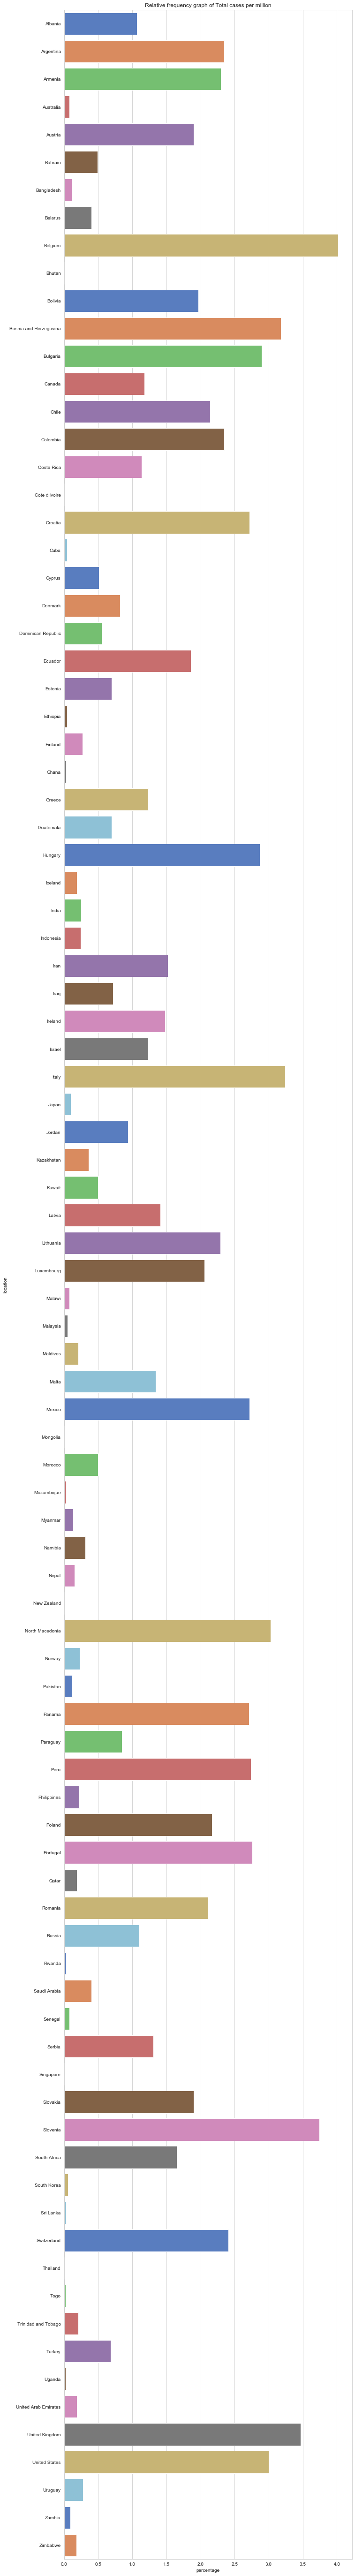

In [118]:
countries = odfdt.groupby('location')['crude_mortality'].sum()
countries_per = countries.groupby('location').agg(percentage =('crude_mortality', lambda p: p.sum() / countries.sum() * 100)).round(2)

sns.set_style("whitegrid")
bar, ax = plt.subplots(figsize=(11,100))
ax = sns.barplot(x="percentage",y=countries_per.index, data=countries_per, ci=None, palette='muted', orient = 'h')
ax.set_title("Relative frequency graph of crude mortality")

In [113]:
odfdt = odfdt[odfdt['total_cases_per_million'].notna()]
odfdt = odfdt[odfdt['population_density'].notna()]

In [116]:
px.scatter(odfdt,x='total_cases_per_million',y='population', size = 'population_density',
           color='location', hover_data=['location'],
           title='Population density vs total_cases_per_million')

if the population of the country is under 1 million, the value of total_cases_per_million is scaled up proportionally and may be inaccurate

In [126]:
px.scatter(odfdt,x='total_deaths_per_million',y='population', size = 'population_density',
           color='location', hover_data=['location'],
           title='Population density vs total_deaths_per_million')

Population density does not look like a large contributing factor to crude mortality rate, when looking at the higher total_deaths_per_million values.

In [130]:
px.scatter(odfdt,x='crude_mortality',y='population', size = 'population_density',
           color='location', hover_data=['location'],
           title='Population density and crude mortality')

In [142]:
px.scatter(odfdt,x='crude_mortality',y='diabetes_prevalence',
           color='location', hover_data=['location'],
           title='Diabetes prevalence and crude mortality')

In [135]:
odfdt_vis = odfdt[odfdt['handwashing_facilities'].notna()]

In [141]:
px.scatter(odfdt_vis,x='crude_mortality',y='handwashing_facilities',
           color='location', hover_data=['location'],
           title='Handwashing facilities and crude mortality')

The data shows that having more handwashing facilities doesn't necessarily indicate better COVID19 outcomes

In [143]:
px.scatter(odfdt,x='crude_mortality',y='median_age',
           color='location', hover_data=['location'],
           title='median age and crude mortality')

- Countries with higher median age are typically hit harder

# Modeling 

### One Hot Encoding for the Random Forest (***may not be used, ignore for now)

In [120]:

y=odf2.total_deaths_per_million
X=odf2[odf2.columns.difference(['total_deaths_per_million','total_cases_per_million','date','tests_units','continent'])]

odf2_onehot = odf2.copy()
odf2_onehot = pd.get_dummies(odf2, columns = str_cols, prefix = str_cols)
odf2_onehot

In [58]:
str_cols = X.select_dtypes(include="object").columns.to_list()
str_cols

odf_onehot = odf.copy()
odf_onehot = pd.get_dummies(odf, columns=str_cols, prefix = str_cols)
odf_onehot

y=odf_onehot.total_deaths_per_million
X=odf_onehot[odf_onehot.columns.difference(['total_deaths_per_million','total_cases_per_million','date','tests_units','continent'])]
#X_o = X.fillna(X.median())

# Random Forest Regressor

In [20]:
y=odf.total_deaths_per_million
#y=odf.total_cases_per_million
#y=odf.reproduction_rate

X=odf[odf.columns.difference(['total_deaths_per_million','total_cases_per_million','date',
                              'tests_units','continent','location','reproduction_rate'])] 

In [22]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [23]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp = imp.fit(train_X)
train_X = imp.transform(train_X)

valimp = SimpleImputer(missing_values=np.nan, strategy='median')
valimp = valimp.fit(val_X)
val_X = valimp.transform(val_X)
##train_y2 = train_y.fillna(train_y.median())

In [27]:
clf = RandomForestRegressor(n_estimators=100, bootstrap = True, random_state = 1)
clf = clf.fit(train_X, train_y)

In [28]:
print('R^2 training set: {:.2f} \nR^2 val set: {:.2f}'.format(clf.score(train_X, train_y),clf.score(val_X, val_y)))


R^2 training set: 1.00 
R^2 val set: 0.97


In [29]:
val_pred = clf.predict(val_X)
val_mae = mean_absolute_error(val_pred, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))

Validation MAE: 13


Extremely high R^2 score and very low MAE suggests severe overfitting of the model 

Feature ranking:
1 	 total_tests_per_thousand 0.30238333179499766
2 	 stringency_index 0.1266759423501055
3 	 female_smokers 0.0993085604737081
4 	 median_age 0.057734203689935336
5 	 cardiovasc_death_rate 0.05572520461657179
6 	 extreme_poverty 0.04853498263097808
7 	 positive_rate 0.04468693442499092
8 	 tests_per_case 0.04082469200895188
9 	 male_smokers 0.034307003397373574
10 	 population_density 0.03411444064722002
11 	 population 0.031872302888283945
12 	 human_development_index 0.027927872882276456
13 	 hospital_beds_per_thousand 0.026200063056643633
14 	 diabetes_prevalence 0.02504891809667056
15 	 gdp_per_capita 0.021205684936216558
16 	 life_expectancy 0.01943986932645278
17 	 handwashing_facilities 0.0040099927786232


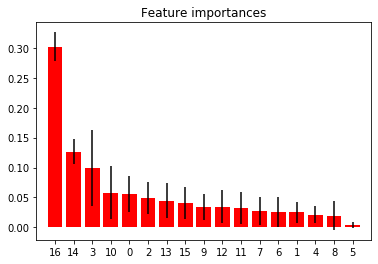

In [30]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range (train_X.shape[1]):
    featurelist = []
    featurelist.append(X.columns[indices[f]])
    print(f + 1,"\t", X.columns[indices[f]], importances[indices[f]])
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(train_X.shape[1]), indices)
plt.xlim([-1, train_X.shape[1]])
plt.show()

The model itself is too biased for these feature importances to hold significance.

# SMOGN : Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise


The imbalanced data SMOGN technique

In [137]:
#!pip install smogn https://pypi.org/project/smogn/#files

# Multiple Regression 

In [67]:
model = sm.OLS(train_y, train_X).fit()

In [68]:
predictions = model.predict(train_X)

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     total_deaths_per_million   R-squared (uncentered):                   0.502
Model:                                  OLS   Adj. R-squared (uncentered):              0.501
Method:                       Least Squares   F-statistic:                              1694.
Date:                      Mon, 08 Mar 2021   Prob (F-statistic):                        0.00
Time:                              22:19:02   Log-Likelihood:                     -2.0113e+05
No. Observations:                     28642   AIC:                                  4.023e+05
Df Residuals:                         28625   BIC:                                  4.024e+05
Df Model:                                17                                                  
Covariance Type:                  nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2815      0.019    -14.998      0.000      -0.318      -0.245
x2            -5.9609      0.620     -9.613      0.000      -7.176      -4.745
x3            -1.1271      0.168     -6.729      0.000      -1.455      -0.799
x4             5.8149      0.267     21.775      0.000       5.291       6.338
x5            -0.0026      0.000    -18.965      0.000      -0.003      -0.002
x6             0.0513      0.117      0.439      0.661      -0.178       0.280
x7           -12.7636      1.024    -12.467      0.000     -14.770     -10.757
x8           302.5648     42.840      7.063      0.000     218.596     386.534
x9            -3.4154      0.422     -8.100      0.000      -4.242      -2.589
x10           -2.1206      0.170    -12.508      0.000      -2.453      -1.788
x11            8.6764      0.524     16.558      0.000       7.649       9.704
x12         3.419e-08   1.17e-08      2.912      0.004    1.12e-08    5.72e-08
x13           -0.0151      0.002     -6.541      0.000      -0.020      -0.011
x14          907.7020     18.085     50.191      0.000     872.255     943.149
x15            0.6867      0.096      7.147      0.000       0.498       0.875
x16           -0.0297      0.002    -13.881      0.000      -0.034      -0.026
x17            0.2984      0.006     53.010      0.000       0.287       0.309
==============================================================================
Omnibus:                    10250.210   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41180.748
Skew:                           1.756   Prob(JB):                         0.00
Kurtosis:                       7.709   Cond. No.                     4.00e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
print(X.columns[8], X.columns[12], X.columns[14])

life_expectancy population_density stringency_index


Pop. Density, Life_expectancy and Stringency_index look like the strongest candidates for feature importance from the linear regression, however these results should be interpreted with caution.

Next steps to fix for the final results;
- bucketize the y output into discrete variables
- try KNN algorithms
- only take the most recent data(time series)